In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels.formula.api as smf

# Regression Analysis

Regressional analysis is used in order to asses the **influence** or **causation** of some variables on other. The variables that act as a **cause** are called **explanatory** or **independent** variables, or **regressors**. The variables that act as a result are called **response** or **dependent** variables, or **regressands**.

---
Consider a class of students, where we have the average of their weekly exams and their end-term exam. We want to know if the result of their weekly exams causes an influence on their end-term grade. Let us first generate our data:

In [19]:
data = pd.DataFrame()
N = 100
data["weekly"] = sps.norm(60, 10).rvs(N)
data["endterm"] = data["weekly"] * 0.8 + 10 + np.random.rand(N) * 10
sns.regplot(data=data, x='weekly', y='endterm', ci=None, marker='+')

We can see that the line describes the data nicely, and so we can see that the line should satisfy the relationship:

$$
y = \beta_0 + \beta_1 x
$$

However, it doesn't fit the data perfectly - this is because there are other factors that affect the end-term score like sleep time, whether the person had a good or bad day, etc. Therefore $Y$ can be considered a random variable given by:

$$
Y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

where $\epsilon$ is the **error term**.

---
We will also assume the following:

- Explanatory variables are not probability variables
- $\epsilon_i \stackrel{i.i.d.}\sim N(0, \sigma^2)$

Using this, we can derive the distribution of our response vairables:

$$
Y_i \stackrel{i.i.d.}\sim N(\beta_0 + \beta_1 x_i, \sigma^2)
$$

Now our job is to estimate $\beta_i$ from the sample we have. This can be done by various methods, however in this case we will use what's called **Ordinary Least Squares**. This will give us the estimated $\hat\beta_i$, which we will use to draw the line:

$$
y = \hat\beta_0 + \hat\beta_1 x
$$

If we fit a regression model to our data with SciPy and then print the summary, we get the following:

In [26]:
m = smf.ols('endterm ~ weekly', data).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                endterm   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     617.1
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           4.38e-44
Time:                        05:13:34   Log-Likelihood:                -249.58
No. Observations:                 100   AIC:                             503.2
Df Residuals:                      98   BIC:                             508.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8292      1.908      8.296      0.000      12.043      19.616
weekly         0.7877      0.032     24.842      0.000       0.725       0.851
==============================================================================
Omnibus:                       40.575   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.456
Skew:                           0.057   Prob(JB):                       0.0396
Kurtosis:                       1.760   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Whoa! We have a lot of information here. Let us go through it in steps.

---
## Regression Coefficients

### Intercept

The free term $\hat\beta_0$ is called the *intercept*.

### `weekly`

This is our first explanatory variable, so this is the row for $\beta_1$.

---
Each coefficient has the following columns:

- `coef`: The estimated value
- `std err`: Standard error of the estimate
- `t` : the t-test statistic of the estimate
- `P>|t|`: the $p$-value of the estimate
- `[a, b]`: the $95\%$ confidence interval of the estimate

---
The difference between the **predicted value** $\hat y_i = \hat\beta_0 + \hat\beta_1 x_i$ and the actual $y_i$ is called the **residual**, and the line that the above summary represents is constructed so that the **residual sum of squares (RSS)** is minimized. The way this is implemented is by using the **Ordinary Least Squares** method.

After calculating $\hat\beta_i$ we have the residual defined as $\hat\epsilon_i = y_i - \hat y_i$. The residuals correspond to the error terms and so we can estimate the residual variance as:

$$
\hat\sigma^2 = \frac{1}{n - p - 1}\sum^n_i(\hat\epsilon_i - \overline\epsilon_i)^2 = \frac{1}{n - p - 1}\sum^n_i{\hat\epsilon_i^2}
$$

**NEEDS PROOF**



---
#### Interval Estimation

In order to get a confidence interval for our regression line, we need to calculate the standard error of $\hat\beta_i$. This is quite complicated, so will only present the result:

$$
\bigg[ \hat\beta_i - t_{\alpha/2}(n - p - 1)\sqrt{\hat\sigma^2C_i}, \hat\beta_i - t_{1 - \alpha/2}(n - p - 1)\sqrt{\hat\sigma^2C_i} \bigg]
$$

where $C_i$ is the $i$-th element of the main diagonal of the matrix $(\textbf{X}\textbf{X}^T)^{-1}$

---
#### t Test

The t test is used with the following hypotheses:

- $h_0: $ $\beta_i = 0$
- $h_1: $ $\beta_i \neq 0$

Performing the t test allows us to prove whether the parameter $x_i$ does indeed influence $y$. The t statistic here is calculated as:

$$
t = \frac{\hat\beta_i - \beta_i}{\sqrt{\hat\sigma^2 C_i}}
$$

which, under the null hypothesis results in:

$$
t = \frac{\hat\beta_i}{\sqrt{\hat\sigma^2 C_i}}
$$

## Dummy Variables

One would wonder how can we perform regression on qualitative variables. A method of resolving this problem is defining a so called **dummy variable** for each of the $n - 1$ values of the qualitative variable. That is, suppose that we had a variable *favorite fruit*, which can take the values *apple*, *orange* and *banana*. Converting this to dummy variables would mean constructing two variables: $x_{\text{apple}}$ and $x_{\text{orange}}$, which would take their values in the following way:

| Fav. Fruit | $x_{\text{apple}}$ | $x_{\text{orange}}$ |
| ---------- | ------------------ | ------------------- |
| Apple      | 1                  | 0                   |
| Orange     | 0                  | 1                   |
| Banana     | 0                  | 0                   |



## Choosing a Model

Statistical models are usually described with two parameters: **goodness of fit** and **predictive accuracy**. 

Goodness of fit represents how well the model describes the data we already have. A good model is one which fits the data and has small residuals (i.e. the line passes close to / through the points).

On the other hand, predictive accuracy is a measure of how well the model describes unknown data. A good model will give an accurate prediction even for data points that do not exist when we construct it.

Unfortunately, these two parameters often exist in an anti-symmetric relationship - that is, increasing the goodness of fit usually results in decreasing the predictive accuracy. 

One can easily "improve" goodness of fit by adding more parameters, however that results in what is called **overfitting** - the model fits the current data too well and is not accurate on unknown data. That is why accuracy is usually the preferred parameter to consider when choosing a model.

Next we will look at various methods of assessing whether a model is good or bad.

## Coefficient of Determination ($R^2$)

The coefficient of determination, also called **R-squared**, is a value that shows us how well the model fits the data. It takes a value between $0$ and $1$ - the closer it is to $1$, the better the model fits the data.

R-squared is based on the following 3 parameters:

- **Total Variance** - this is the total variance of the data, calculated as $\sum_i^n{(y_i - \overline{y})^2}$
- **Explained Variance** - this is the variance of the predictions with respect to the sample mean, calculated as $\sum_i^n{(\hat y_i - \overline{y})^2}$
- **Unexplained Variance** - this is the variance of the residuals (where the mean is always 0), calculated as $\sum_i^n{\hat\epsilon_i^2}$

These three parameters form the following relationship:

$$
\text{Total Variance} = \text{Explained Variance} + \text{Unexplained Variance}
$$

Since all of these 3 are positive, we can see that the larger the explained variance is, the better our data fits the model. In other words, we can set:

$$
R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}} = 1 - \frac{\text{Unexplained Variance}}{\text{Total Variance}}
$$

In a simple regression model, R-squared is known to be equal to the square of the **correlation coefficient** - $r_{xy}^2$.

Unfortunately, it is known that regardless of the relevance of a variable, if we increase the number of regressors, R-squared will increase. That is, if we were trying to predict shampoo sales in India and decided to include the weather conditions of New York as a parameter, R-squared would still increase even though the two obviously have nothing in common.

This is why we use what is called the:

## Adjusted R-squared ($\overline{R^2}$)

The adjusted R-squared "filters" regressors - it discards regressors that do not have a certain amount of influence on the regressand. It is calculated as:

$$
\overline{R^2} = \frac{\text{Explained Variance} / n - p - 1}{\text{Total Variance} / n - 1}
$$

where we know that the total degrees of freedom for the data are always $n - 1$ and the degrees of freedom of the residuals are always $n - p - 1$, where $n$ is the number of data points and $p$ is one plus the number of regression coefficients. 

## F-test

The F-test is performed with the following hypotheses on all the coefficients excluding the intercept:

- $h_0: \beta_1 = \beta_2 = ... = \beta_i = 0$
- $h_1: $ at least one of $\beta_i$ is not 0

The F statistic is calculated as:

$$
F = \frac{\text{Explained Variance} / p}{\text{Unexplained Variance} / n - p - 1}
$$

Dividing each variance by its degrees of freedom allows us to interpret the F test as a relationship of variances which is why it is often called **Analysis of Variance** or in short **ANOVA**. Again, the greater the explained variance is, the better the model fits our data.

## Akaike's Information Criterion (AIC)

Up until now we talked about parameters which evaluate the goodness of fit of a model. Hereafter we will talk about parameters assessing the accuracy of a model, however we first need to introduce a few additional concepts.

## Likelihood

Likelihood is defined as the probability that a certain set of observations occur. For example, if we had a biased coin which falls on tails $100p\%$ of the time, the likelihood of the outcomes $\textbf{X} \in \{0, 1\}^n$ (0 - heads, 1 - tails) would be:

$$
L(p) = \prod_i^n f(x_i) = \prod_i^n p^{x_i}(1-p)^{1 - x_i}
$$

The graph of this function for $\textbf{X} = ( 0\;1\;0\;0\;1)$ looks like this:

L is maximized at p = 0.4


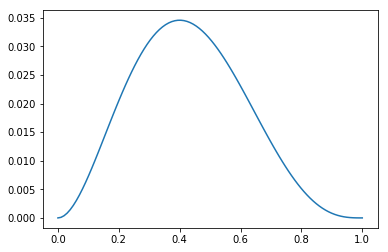

In [43]:
X = np.array([0, 1, 0, 0, 1])
def L(p):
    a = np.array([(p ** x) * ((1 - p) ** (1 - x)) for x in X])
    return np.prod(a, axis=0)
xs = np.linspace(0, 1, 100)
ys = L(xs)
sns.lineplot(x=xs, y=L(xs))
print(f"L is maximized at p = {xs[np.argmax(ys)]:.1f}")

In this case, we can say that the **most likely** value of $p$ is $0.4$. This method of inference is called the **method of maximum likelihood**. The estimator and estimate are respectively called **maximum likelihood estimator** and **maximum likelihood estimate**.

---
It should be obvious that in the above case $\lim_{n\to\infty}L = 0$. Because of this, it gets increasingly harder to calculate $L$, both by hand and with a computer, so instead we use what is called the **log-likelihood**.

$$
\log L = \sum_i^n \log f(x_i)
$$

The log-likelihood is also maximized at the same point as $L$ and we call that value the **maximum log-likelihood**.

---
Let us return to our regression model. It is known that the maximum likelihood estimators for $\beta_i$ and $\sigma^2$ are $\hat\beta^i$ and $\frac{1}{n}\sum_i^n \hat\epsilon_i$ respectively. <sup>**NEEDS PROOF**</sup>

We are going to compute the likelihood that each $y_i$ is normally distributed around $\hat y_i$ with variance $\frac{1}{n}\sum_i^n \hat\epsilon_i$, given our data points.

Therefore, if we set:

$$
X \sim N(\hat y, \frac{1}{n}\sum_i^n \hat\epsilon_i)
$$

We can write the log-likelihood function:

$$
\log L = \sum^n_i \log f(x_i)
$$

Here we can say that the higher the value of the log-likelihood function, the better our model fits the data. Unfortunately, the log-likelihood function is similar to R-squared in that it grows whenever we add a variable, regardless of whether that variable actually has any relevance to our model.

### AIC

AIC is a parameter which considers the accuracy as well as the log-likelihood of the model. Therefore it is often the parameter used to decide what model to adopt for a given situation. 

Given $k$ as the number of regressors and $\hat L$ as the maximum likelihood, AIC is defined as:

$$
\text{AIC} = 2k - 2\ln \hat L
$$

AIC only allows us to **compare** different models - it does not tell us anything about the absolute quality of a given model. The lower the AIC value is - the better the model is.

### Bayesian Information Criterion (BIC)

BIC is a parameter similar to AIC. It is calculated as:

$$
\text{BIC} = k\ln n -2\ln\hat L 
$$

That is, it penalizes the model based on the number of regressors.

## Goodness of the Model

Finally, we need to assess our initial assumption that the error terms $\epsilon_i$ obey a $N(0, \sigma^2)$ distribution. For this we use two tests - **Omnibus** and **Jarque-Bera**. Both of these test the following hypotheses:

- $h_0: $ the residuals are normally distributed
- $h_1: $ the residuals are not normally distributed

### Skewness and Kurtosis

**Skewness** is a measure of how skewed the distribution is. A distribution is skewed if it resembles the chi-square distribution (when the skewness is larger than 0) or the curve symmetric to it with respect to the $y$ axis (when the skewness is less than 0).

**Kurtosis** is a measure of the extermity of either tail. That is, a distribution with a high kurtosis is less concentrated around a given value and vice versa. It is known that the kurtosis of the standard distribution is 3, so we can use that to evaluate whether our distribution is normal or not.

### Durbin-Watson Ratio

The Durbin-Watson ratio evaluates whether all error terms are **irrelevant** of each other. It is especially useful when considering time data and is calculated as:

$$
\frac{\sum_{i=2}^n{(\hat\epsilon_i - \hat\epsilon_{i-1})^2}}{\sum_i^n\hat\epsilon_i}
$$

This takes a value between $0$ and $4$, where $0$ indicates a positive relationship, $4$ indicates a negative relationship and $2$ indicates no relationship.

### Multicolinearity

Multicolinearity is seen whenever we have two regressors that are relevant to each other. The effect of this, is that small changes in data can result in wildly different models, and while the overall model will not give wrong results, we cannot say anything about the individual regressors - i.e. we cannot say that $x_i$ is about $\beta_i$ influential on $y$ etc.

In order to detect multicolinearity, we use the so called **condition number** (included in `statsmodels`'s output). If the condition number is very large, one should suspect multicolinearity.